## Project 2 - Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

# Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

# Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict using xgboost

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(4209, 378)

In [4]:
df_test.shape

(4209, 377)

#### Check for null and unique values for test and train sets

In [5]:
null_exist = df_train.isnull().sum().any()
if null_exist == True:
    print("nulls found")
else:
    print("none")

none


In [6]:
dup_exist = df_train.duplicated().sum().any()
if dup_exist == True:
    print("duplicate rows found")
else:
    print("none")

none


In [7]:
columns = [c for c in df_train.columns if 'X' in c]
print("Features: {}".format(len(columns)))

df_train[columns].dtypes.value_counts()

Features: 376


int64     368
object      8
dtype: int64

<Figure size 720x720 with 0 Axes>

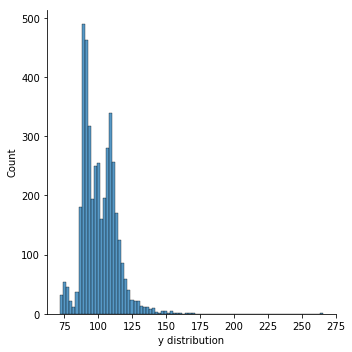

In [8]:
# Distribution of target (dependent variable)

plt.figure(figsize=(10,10))
sns.displot(df_train['y'])
plt.xlabel("y distribution")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

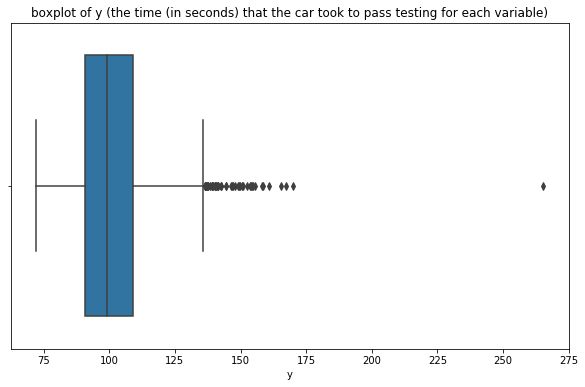

In [9]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x=df_train['y'])
plt.title('boxplot of y (the time (in seconds) that the car took to pass testing for each variable)')
plt.show

In [10]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [11]:
lowerbound,upperbound = outlier_treatment(df_train['y'])

In [12]:
print(lowerbound)
print(upperbound)

63.534999999999975
136.29500000000002


In [13]:
# remove the outlier
df_train = df_train[df_train['y'] < 140]

<function matplotlib.pyplot.show(*args, **kw)>

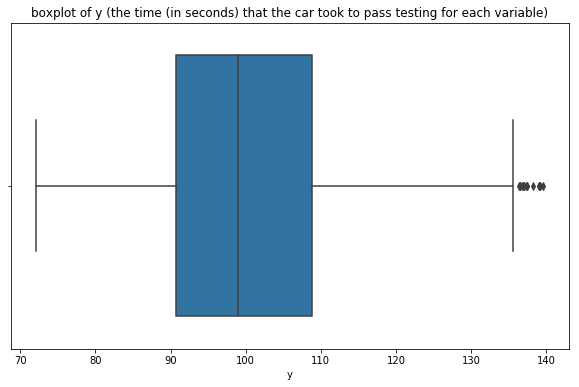

In [14]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x=df_train['y'])
plt.title('boxplot of y (the time (in seconds) that the car took to pass testing for each variable)')
plt.show

In [15]:
df_train.shape

(4174, 378)

<function matplotlib.pyplot.show(*args, **kw)>

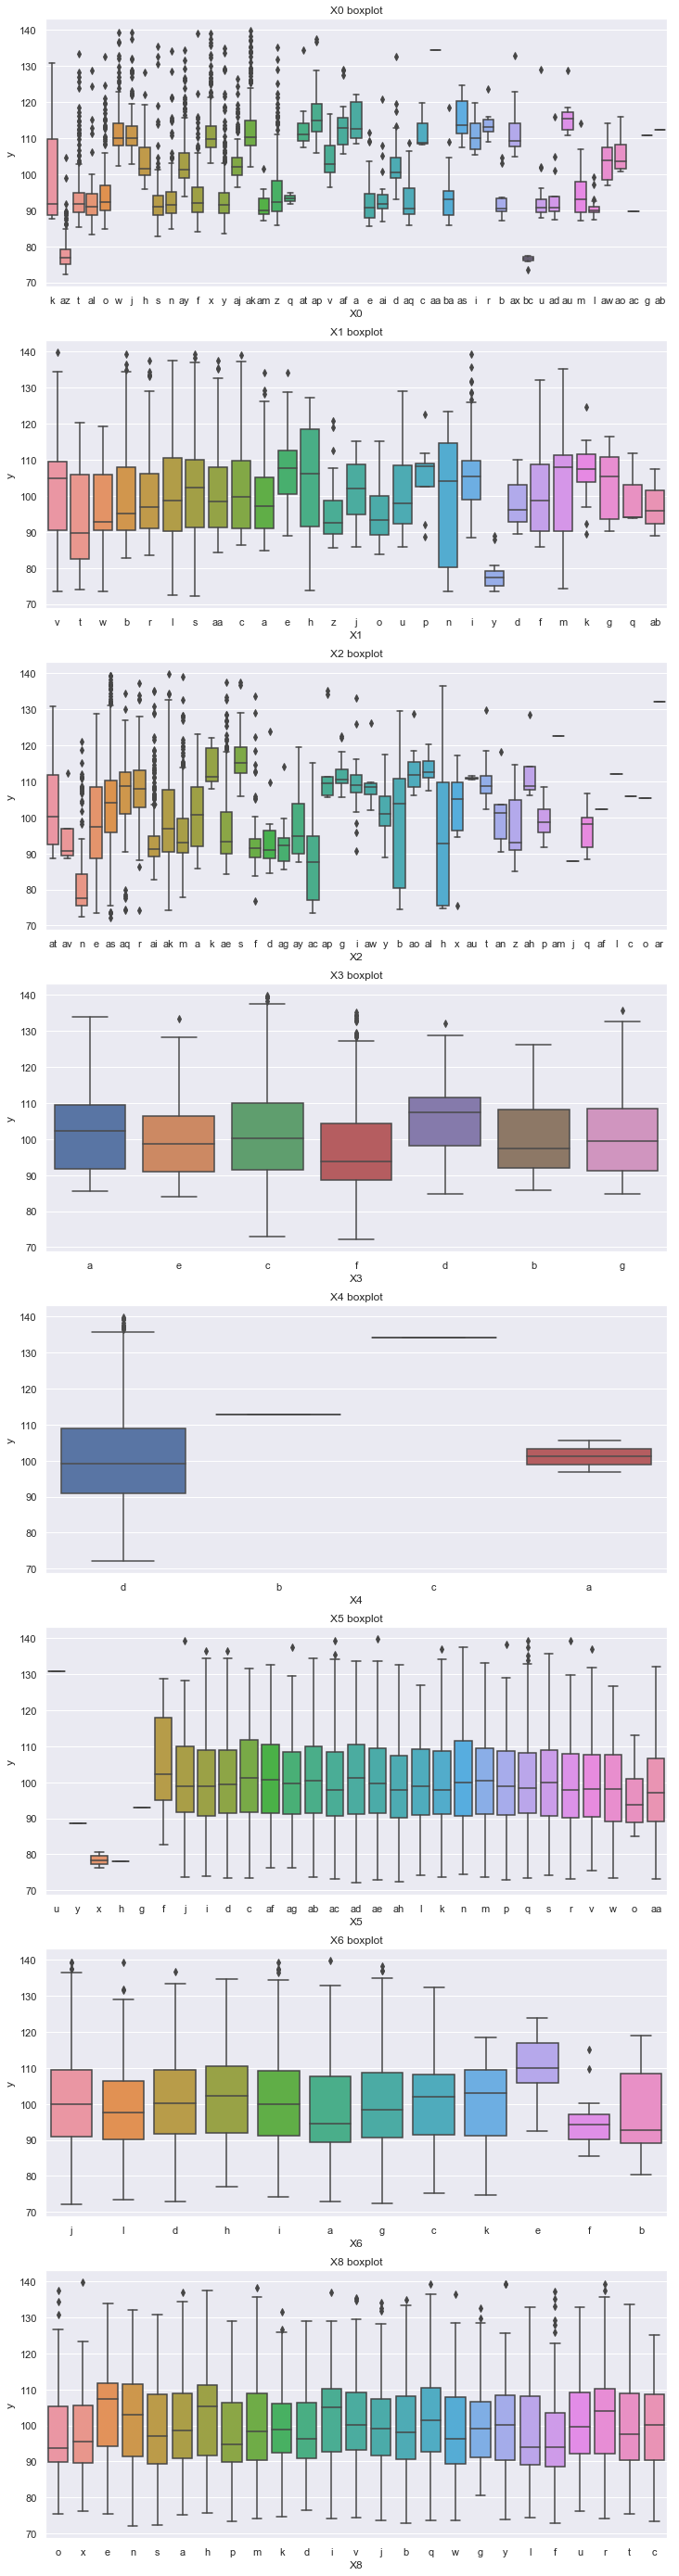

In [16]:
sns.set()
plt.subplots(figsize=(12, 50))
plt.subplot(8, 1, 1)
sns.boxplot(x='X0', y='y', data=df_train)
plt.title('X0 boxplot')
plt.subplot(8, 1, 2)
sns.boxplot(x='X1', y='y', data=df_train)
plt.title('X1 boxplot')
plt.subplot(8, 1, 3)
sns.boxplot(x='X2', y='y', data=df_train)
plt.title('X2 boxplot')
plt.subplot(8, 1, 4)
sns.boxplot(x='X3', y='y', data=df_train)
plt.title('X3 boxplot')
plt.subplot(8, 1, 5)
sns.boxplot(x='X4', y='y', data=df_train)
plt.title('X4 boxplot')
plt.subplot(8, 1, 6)
sns.boxplot(x='X5', y='y', data=df_train)
plt.title('X5 boxplot')
plt.subplot(8, 1, 7)
sns.boxplot(x='X6', y='y', data=df_train)
plt.title('X6 boxplot')
plt.subplot(8, 1, 8)
sns.boxplot(x='X8', y='y', data=df_train)
plt.title('X8 boxplot')
plt.show

In [17]:
df_train['X4'].value_counts()

d    4170
a       2
c       1
b       1
Name: X4, dtype: int64

In [18]:
variance_by_features = []
feature_col = []
for column in df_train:
    if max(df_train[column])==1:
        feature_col.append(column)
        variance = df_train[column].var()
        variance_by_features.append(variance)
#print('variance for column',column, 'is', variance)
#variance_by_features

In [19]:
data = {'column':feature_col,'variance':variance_by_features}
df_variance = pd.DataFrame(data)
df_variance.head()

,column,variance
0,X10,0.013240
1,X12,0.069178
2,X13,0.054418
3,X14,0.244893
4,X15,0.000479


In [20]:
df_variance.duplicated(subset=['variance']).sum()
dup_sub_variance = df_variance.loc[df_variance['variance'].duplicated(keep='first'),:]

In [21]:
dup_sub_variance = list(dup_sub_variance['column'])
#dup_sub_variance

#### Get the Categorical features and then apply label encoder.

In [22]:
categorical = []
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        categorical.append(col)
        print(col, df_train[col].nunique())

X0 47
X1 27
X2 43
X3 7
X4 4
X5 29
X6 12
X8 25


#### If for any column(s), the variance is equal to zero, then you need to remove those column(s).

Column with only one value have no variance

In [23]:
const_column = []
for column in df_train.columns:
    no_variance = len(np.unique(df_train[column]))
    if no_variance == 1:
        df_train.drop(column, axis=1) 
        df_test.drop(column, axis=1)
        const_column.append(column)
        print(column)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X339
X347


The following needs to be dropped
[X11 X93 X107 X233 X235 X268 X289 X290 X293 X297 X330 X339 X347]

In [24]:
feature_drop = const_column + dup_sub_variance



All columns that needs to be dropped

['X4', 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347', 'X35', 'X37', 'X39', 'X57', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X120', 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X172', 'X194', 'X199', 'X205', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X263', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385']

In [25]:
feature_drop.append('ID')

In [26]:
len(feature_drop)

69

In [27]:
target = df_train['y']
train = df_train.drop(columns = 'y', inplace = True)

In [28]:
# before dropping columns
df_train.shape

(4174, 377)

In [29]:
train = df_train.drop(columns = feature_drop, axis = 1)

In [30]:
test_ID = df_test['ID']

In [31]:
test = df_test.drop(columns = feature_drop, axis = 1)

In [32]:
# after dropping columns
train.shape

(4174, 308)

In [33]:
test.shape

(4209, 308)

#### Apply label encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
df_cat = train[categorical]
for category in categorical:
    label_encoder = LabelEncoder()
    df_cat[category] = label_encoder.fit_transform(df_cat[category].values)
    train[category] = df_cat[category]
df_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,16,0,3,24,9,14
1,32,21,18,4,3,28,11,14
2,20,24,33,2,3,27,9,23
3,20,21,33,5,3,27,11,4
4,20,23,33,5,3,12,3,13


#### Perform dimensionality reduction.

In [35]:
components = 10

pca = PCA(n_components=components, random_state=420)

pca_train = pca.fit_transform(train.drop(categorical, axis=1))
pca_test = pca.fit_transform(test.drop(categorical, axis=1))

print(pca_train.shape)
print(pca_test.shape)

(4174, 10)
(4209, 10)


#### Predict using xgboost

In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(pca_train, target, test_size=0.2, random_state=123)

In [38]:
model = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3,
                         learning_rate=0.1, max_depth=5, alpha=10, n_estimator=10)
model.fit(Xtrain, ytrain)

[12:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=10, n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
y_predict = model.predict(Xtest)

In [40]:
rmse = np.sqrt(mean_squared_error(ytest, y_predict))
print('RMSE: %f' % (rmse))

RMSE: 7.507986


#### Implement XGBoost with K Fold Cross Validation

1. nfold = run 10 Fold Cross Validation.
2. metrics = root mean square error (accuracy).
3. num_boost_round = 50: number of trees to build (like n_estimators)
4. early_stopping_rounds = 10: finishes training of the model early if rmse does not improve
5. as_pandas: returns the results (cv_result) in a pandas data frame.
6. seed: reproduce results.

In [41]:
# convert our dataset into an optimized data structure called DMatrix
d_matrix = xgb.DMatrix(data=pca_train, label=target)
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
         'max_depth': 5, 'alpha': 10}

cv_result = xgb.cv(dtrain=d_matrix, params=params, nfold=10, num_boost_round=50,
                  early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=123)

cv_result.head()

[12:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,90.491729,0.076002,90.487595,0.737503
1,81.571061,0.070544,81.568001,0.721385
2,73.551670,0.067212,73.552211,0.701300
3,66.341935,0.060232,66.342267,0.695018
4,59.856050,0.058996,59.857304,0.676632


In [43]:
print((cv_result["test-rmse-mean"]).tail())

45    7.706410
46    7.690310
47    7.676927
48    7.664813
49    7.656704
Name: test-rmse-mean, dtype: float64


In [50]:
predicted = model.predict(pca_test)

In [51]:
df = pd.DataFrame()
df['ID'] = test_ID
df['y'] = predicted

df.head(10)

,ID,y
0,1,90.179703
1,2,103.951736
2,3,92.392105
3,4,84.909607
4,5,104.485725
5,8,89.291183
6,10,99.426697
7,11,101.245911
8,12,114.173866
9,14,102.046310
